# 911 Calls Project

For this capstone project we will be analyzing '911 call' data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
* Import numpy and pandas 

In [1]:
import numpy as np
import pandas as pd

* Import visualization libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

* Read in the csv file as a dataframe called df

In [5]:
df = pd.read_csv('911.csv')

* Check the info() of the df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


* Check the head of df 

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Information About Table

* Top 5 zipcodes for 911 calls 

In [13]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

* Top 5 townships (twp) for 911 calls 

In [15]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

* How many unique title codes are there

In [18]:
df['title'].nunique()

110

## Creating new features

* In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value. *


In [26]:
def test(name):
    for i in range(len(name)):
        if(name[i] == ':'):
            return(name[:i])
df['Reason'] = df['title'].apply(lambda x: test(x))
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

* What is the most common Reason for a 911 call based off of this new column

In [29]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [31]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

* Now we use seaborn to create a countplot of 911 calls by Reason

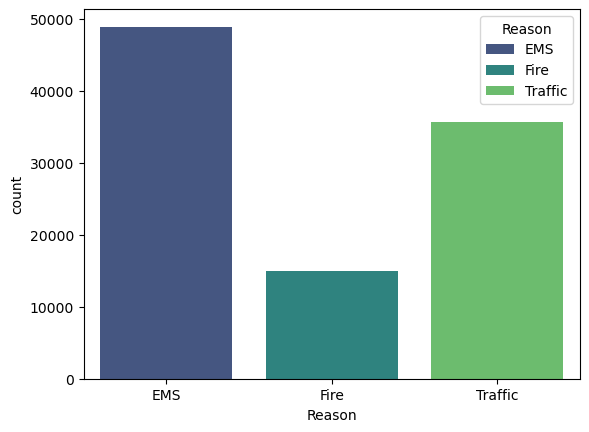

In [35]:
sns.countplot(x = 'Reason', data = df, legend=True, hue = 'Reason', palette = 'viridis')
plt.show()

___
* What is the data type of the objects in the timeStamp column. Later, we are going to work with this type

In [37]:
type(df['timeStamp'].iloc[0])

str

* You should have seen that these timestamps are still strings. We use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects

In [41]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [43]:
time = df['timeStamp'].iloc[0]
time.dayofweek, time.day_of_week

(3, 3)

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [47]:
df['Day_of_Week'] = df['timeStamp'].dt.dayofweek.map(dmap)
df['Day_of_Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day_of_Week, Length: 99492, dtype: object

In [49]:
df['Month'] = df['timeStamp'].dt.month
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int32

* Also we use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

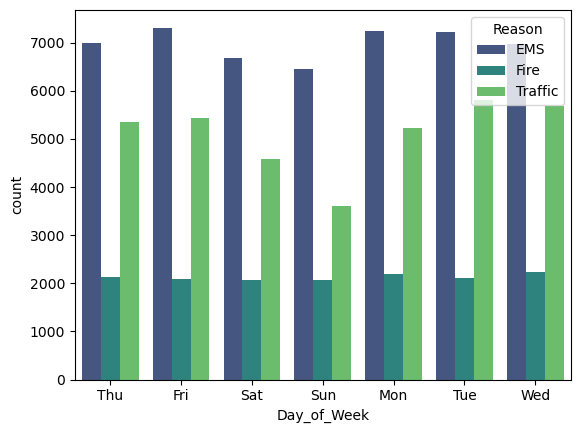

In [52]:
sns.countplot(x = 'Day_of_Week', hue = 'Reason', legend = 1, data = df, palette = 'viridis')
plt.show() 

* Now do the same for Month

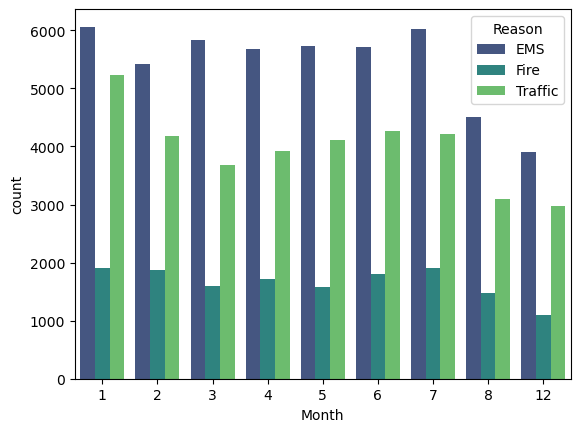

In [54]:
sns.countplot(x = 'Month', hue = 'Reason', legend = 1, data = df, palette = 'viridis')
plt.show()


_____

* You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas

* We create a gropuby object called byMonth, for grouping the DataFrame by the month column and use the count() method for aggregation. Used the head() method on this returned DataFrame. 

In [58]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


* Created a simple plot of the dataframe indicating the count of calls per month. 

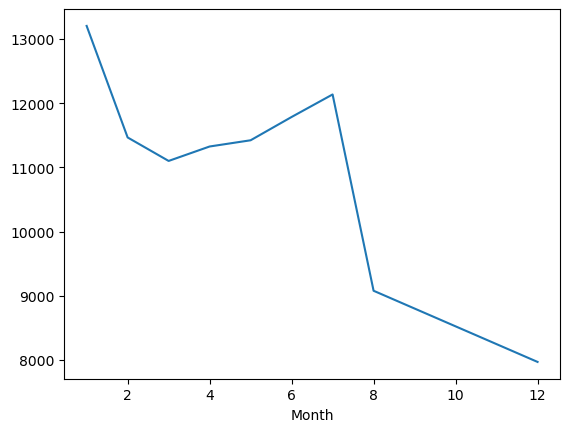

In [61]:
byMonth['e'].plot() # we can use any column
plt.show()

* Now we see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month. For this we also need to reset the index to a column. 

In [65]:
df.count()

lat            99492
lng            99492
desc           99492
zip            86637
title          99492
timeStamp      99492
twp            99449
addr           98973
e              99492
Reason         99492
Day_of_Week    99492
Month          99492
dtype: int64

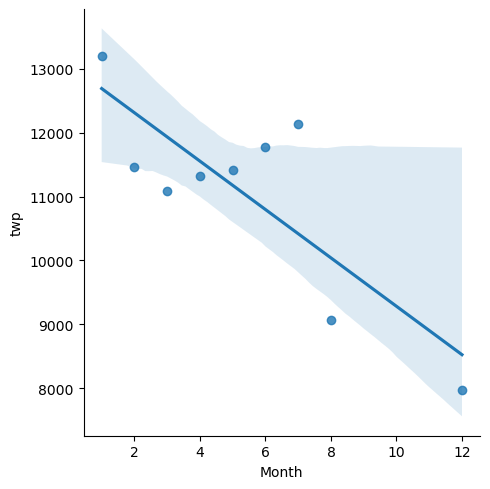

In [67]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())
plt.show()

* Created a new column called 'Date' that contains the date from the timeStamp column. We needed to use apply along with the .date() method. *

In [69]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

* Then we grouped this Date column with the count() aggregate and created a plot of counts of 911 calls.

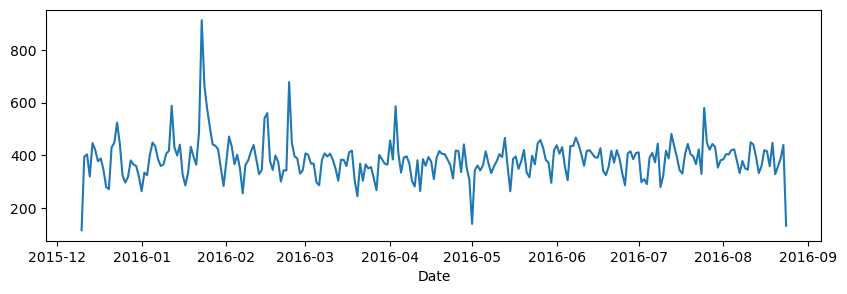

In [73]:
plt.figure(figsize = (10,3))
byDate = df.groupby('Date')['twp'].count()
byDate.plot(legend = False)
plt.show()

* We recreated this plot but created 3 separate plots with each plot representing a Reason for the 911 call

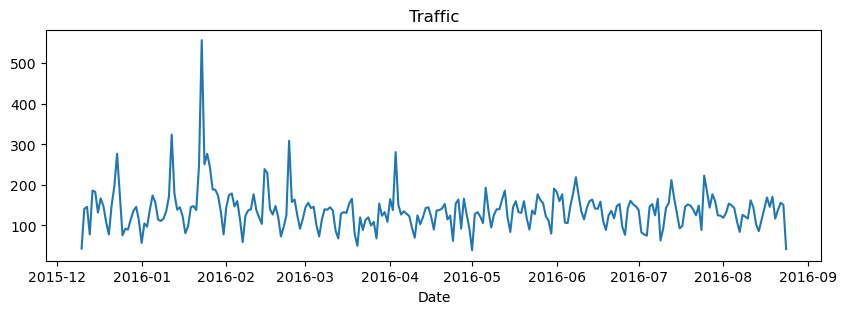

In [76]:
plt.figure(figsize = (10,3))
by_1 = df[df['Reason'] == 'Traffic'].groupby('Date')['twp'].count()
by_1.plot()
plt.title('Traffic')
plt.show()

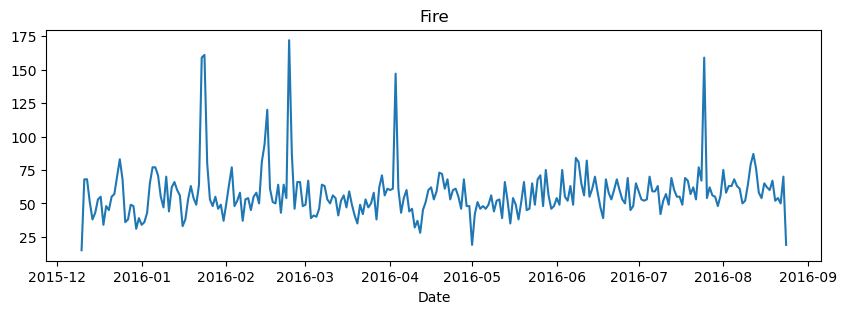

In [78]:
plt.figure(figsize = (10,3))
by_2 = df[df['Reason'] == 'Fire'].groupby('Date')['twp'].count()
by_2.plot()
plt.title('Fire')
plt.show()

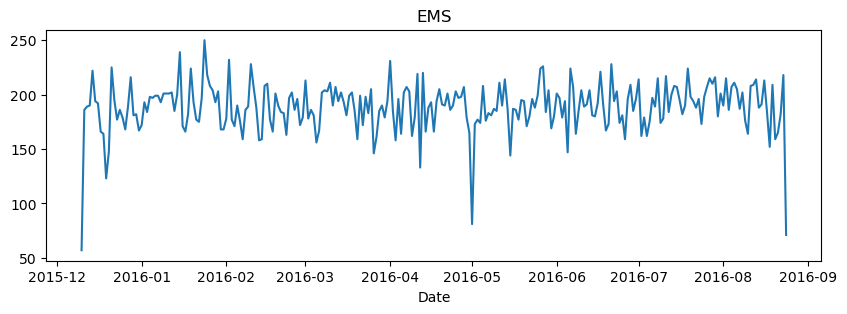

In [80]:
plt.figure(figsize = (10,3))
by_3 = df[df['Reason'] == 'EMS'].groupby('Date')['twp'].count()
by_3.plot()
plt.title('EMS')
plt.show()

____


In [83]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
byHour = df.groupby(by = ['Day_of_Week', 'Hour'])['Reason'].count().unstack()
byHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


* Here we created a HeatMap using this new DataFrame. 

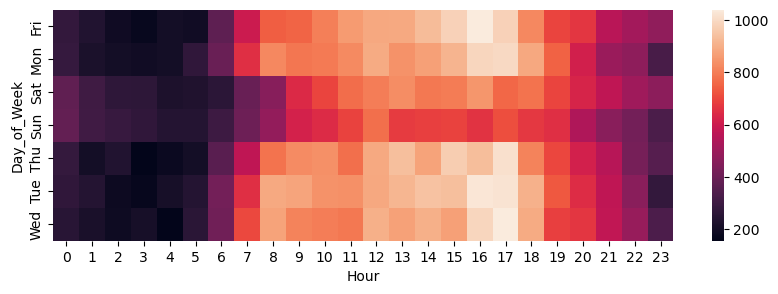

In [86]:
plt.figure(figsize = (10,3))
sns.heatmap(data = byHour)
plt.show()

* Clustermap using this DataFrame.

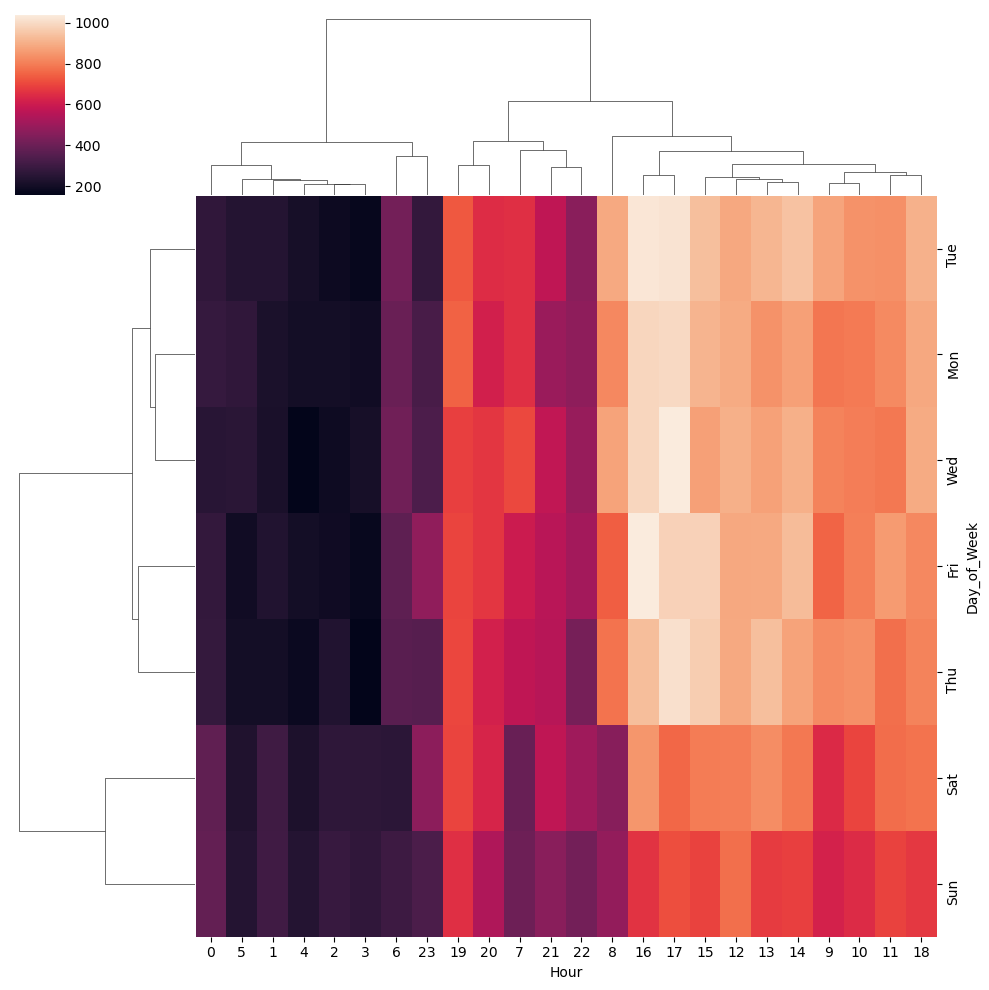

In [89]:
sns.clustermap(data = byHour)
plt.show()

* And we repeated these same plots and operations, for a DataFrame that shows the Month as the column. 

In [92]:
byMonth = df.groupby(by = ['Day_of_Week', 'Month'])['Reason'].count().unstack()
byMonth

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


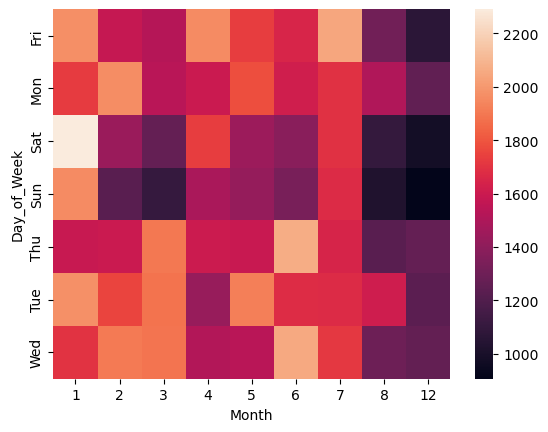

In [106]:
sns.heatmap(data = byMonth)
plt.show()

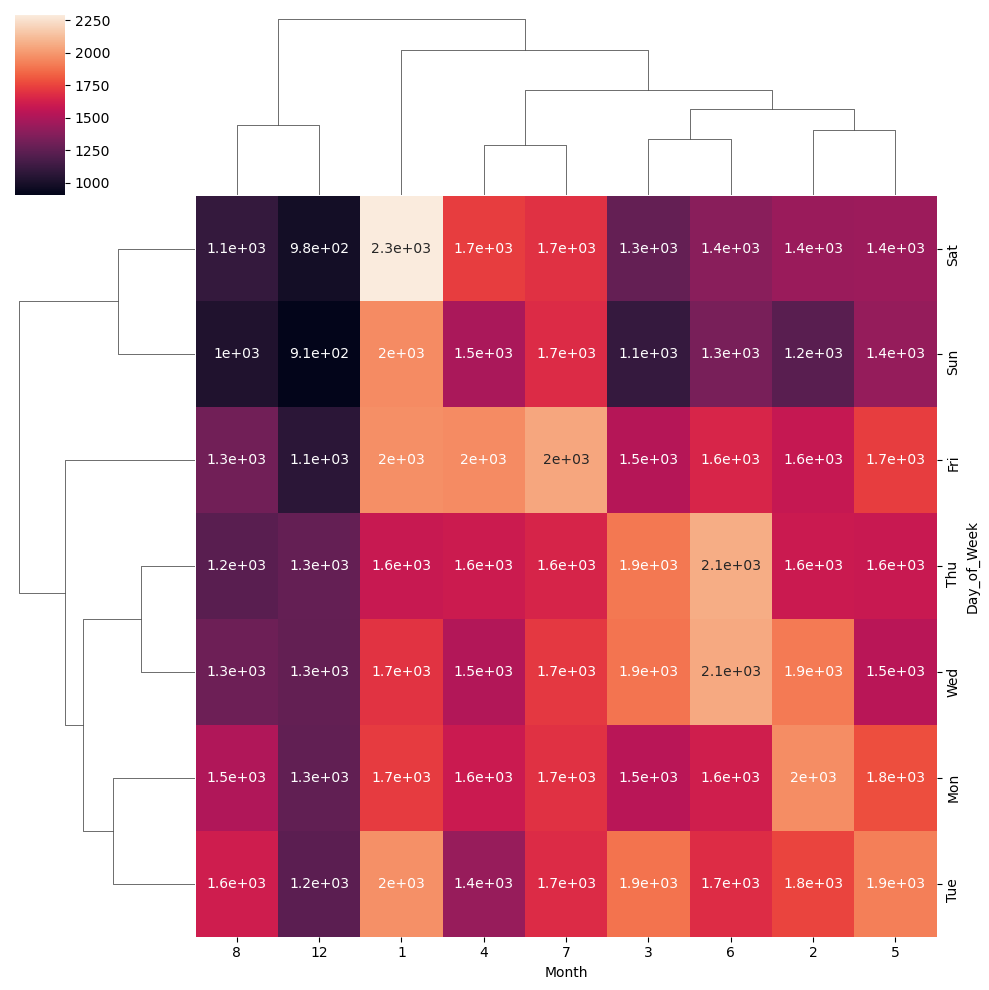

In [102]:
sns.clustermap(data = byMonth, annot = True)
plt.show()